# Dijkstra's algortihm

### Import the relevant libraries

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import time

### Start the timer and import the txt file with the data

In [18]:
#start timer
time_start = time.perf_counter()

#import the data
G = nx.read_weighted_edgelist('data_meet_06.txt')

### Read the imported file and save it in a new array for further calculations

In [19]:
#create a new array and fill it with the data from the previous read in file
raw_matrix = []
with open("data_meet_06.txt") as file:
    for line in file.readlines():
        raw_matrix.append(line.split())

### Print the before created array to examine if it worked correctly

In [20]:
#print array
for x in range(len(raw_matrix)): 
    print (raw_matrix[x],)

#how many edges and nodes contains the file?   
print("\nThere are",G.number_of_edges(),"edges and",G.number_of_nodes(),"nodes in the dataset.")

['Amsterdam', 'Wien', '1']
['Wien', 'Helsinki', '2']
['Amsterdam', 'Helsinki', '3']
['Helsinki', 'Stockholm', '4']
['Stockholm', 'Berlin', '2']
['Wien', 'Berlin', '1']

There are 6 edges and 5 nodes in the dataset.


### Define the start and the end node and calculate the optimal route

In [21]:
u = "Amsterdam" # start node
v = "Berlin" # end node
emissions = nx.dijkstra_path_length(G,u,v)
path = nx.dijkstra_path(G,u,v)
optimal_route = [(path[i - 1], path[i]) for i in range(1, len(path))]

print("\nFrom {} to {} the amount of the CO2-emission for the truck is {}" .format(u,v,emissions))
print("Route is as following", path)


From Amsterdam to Berlin the amount of the CO2-emission for the truck is 2.0
Route is as following ['Amsterdam', 'Wien', 'Berlin']


# Exkurs

In [22]:
#to show the optimal route
print("Result of the calculation has that format:\n",path)
print("\nThis format is needed to mark the optimal route:\n",G.edges)
print("\nCoding to get the format is as following:\noptimal_route = [(path[i - 1], path[i]) for i in range(1, len(path))]")
print("\nIt works :-)\n",optimal_route)

Result of the calculation has that format:
 ['Amsterdam', 'Wien', 'Berlin']

This format is needed to mark the optimal route:
 [('Amsterdam', 'Wien'), ('Amsterdam', 'Helsinki'), ('Wien', 'Helsinki'), ('Wien', 'Berlin'), ('Helsinki', 'Stockholm'), ('Stockholm', 'Berlin')]

Coding to get the format is as following:
optimal_route = [(path[i - 1], path[i]) for i in range(1, len(path))]

It works :-)
 [('Amsterdam', 'Wien'), ('Wien', 'Berlin')]


### Mark, print and save the plot with the optimal route

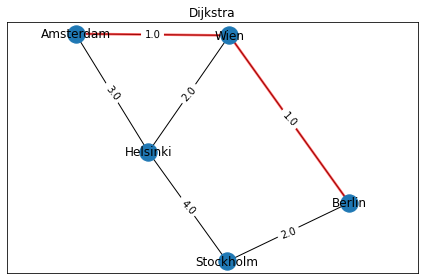

In [23]:
# layout of the plot
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.title("Dijkstra")
nx.draw_networkx_edges(G, pos, width = 2.5, alpha = 0.6, edgelist = optimal_route, edge_color = 'r')
plt.tight_layout()
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.savefig('dijkstra_001.png')
plt.show()

### Stop timer and get the computational time

In [7]:
#stop timer and print result
computation_time = (time.perf_counter() - time_start)
print('\nComputational time for the Dijkstra algorithm is:', round(computation_time,4))


Computational time for the Dijkstra algorithm is: 93.806
